# 🚀 Guia de Análise de Dados com Python: Estudo de Caso (CRISP-DM)

Olá! Bem-vindo à nossa aula prática de análise e visualização de dados. Hoje, vamos aplicar os conceitos que aprendemos em um projeto real, usando uma metodologia padrão de mercado chamada CRISP-DM.

Nosso objetivo é analisar um dataset que simula os padrões de tempo de tela de crianças e adolescentes na Índia, buscando entender os hábitos, os impactos na saúde e as diferenças demográficas.

**Metodologia:** CRISP-DM

Vamos seguir as 3 primeiras fases deste ciclo:
1. Entendimento do Negócio: Definir o problema e os objetivos.
2. Entendimento dos Dados: Carregar e explorar o dataset.
3. Preparação dos Dados: Limpar, otimizar e transformar os dados para análise.

Ao final, faremos a Análise Exploratória e a Visualização para responder às nossas perguntas.

# 💼 Fase 1: Entendimento do Negócio

**Contexto:** O tempo de tela entre crianças e adolescentes na Índia aumentou drasticamente, especialmente após a pandemia. Estudos indicam que o uso excessivo está correlacionado a problemas de sono, ansiedade e risco de obesidade. Uma organização de saúde pública quer entender melhor esses padrões para criar campanhas de conscientização eficazes.

**Objetivos do Projeto:**
1. Identificar os principais fatores que influenciam o tempo de tela (idade, gênero, localidade).
2. Analisar a relação entre o tempo de tela e os impactos negativos na saúde.
3. Verificar se o uso para fins educacionais e recreativos varia com a idade.
4. Gerar visualizações claras para comunicar os achados para as equipes de saúde.

**Pergunta Central:** Quais são os perfis de crianças e adolescentes com maior risco associado ao tempo de tela excessivo?

# 📊 Fase 2: Entendimento dos Dados (Parte 1)

Nesta fase, nosso trabalho é carregar os dados e fazer uma exploração inicial para entender sua estrutura, qualidade e características principais.

Vamos começar importando as bibliotecas necessárias e carregando o arquivo Indian_Kids_Screen_Time.csv.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Define um tamanho padrão para as figuras

In [2]:
# Carregar o arquivo CSV para um DataFrame do pandas
df = pd.read_csv('Indian_Kids_Screen_Time.csv')
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban
...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban


In [3]:
print("--- 5 Primeiras Linhas do DataFrame ---")
display(df.head())
print("\n--- 5 Últimas Linhas do DataFrame ---")
display(df.tail())
print("\n--- 5 linhas Aleatórias do DataFrame ---")
display(df.sample(5))

--- 5 Primeiras Linhas do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban



--- 5 Últimas Linhas do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban
9711,15,Female,6.12,TV,True,0.33,Anxiety,Urban



--- 5 linhas Aleatórias do DataFrame ---


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
4562,17,Male,3.92,TV,True,0.37,Poor Sleep,Urban
4174,14,Female,3.65,Smartphone,True,0.45,NaN,Urban
1243,17,Male,4.42,Smartphone,True,0.36,"Eye Strain, Anxiety",Urban
6701,13,Male,4.82,Laptop,True,0.35,NaN,Urban
3695,13,Female,3.20,Smartphone,True,0.48,"Poor Sleep, Obesity Risk",Urban


In [6]:
# Obter um resumo técnico: tipos de dados, contagem de nulos e uso de memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


Colunas com tipo de dado 'object' armazenam referências para os dados reais (como strings), portanto o uso de memória padrão não reflete o tamanho real ocupado. Para calcular o uso de memória real, incluindo o conteúdo referenciado, usamos memory_usage='deep'.

In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 2.3 MB


In [8]:
# Obter estatísticas descritivas para as colunas numéricas
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,9712.0,NaN,NaN,NaN,12.979201,3.162437,8.0,10.0,13.0,16.0,18.0
Gender,9712,2,Male,4942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg_Daily_Screen_Time_hr,9712.0,NaN,NaN,NaN,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Primary_Device,9712,4,Smartphone,4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Exceeded_Recommended_Limit,9712,2,True,8301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Educational_to_Recreational_Ratio,9712.0,NaN,NaN,NaN,0.427226,0.073221,0.3,0.37,0.43,0.48,0.6
Health_Impacts,6494,15,Poor Sleep,2268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Urban_or_Rural,9712,2,Urban,6851,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


In [11]:
df['Gender'].value_counts()

Gender
Male      4942
Female    4770
Name: count, dtype: int64

In [12]:
df['Primary_Device'].value_counts()

Primary_Device
Smartphone    4568
TV            2487
Laptop        1433
Tablet        1224
Name: count, dtype: int64

In [13]:
df['Health_Impacts'].value_counts()

Health_Impacts
Poor Sleep                                       2268
Poor Sleep, Eye Strain                            979
Eye Strain                                        644
Poor Sleep, Anxiety                               608
Poor Sleep, Obesity Risk                          452
Anxiety                                           385
Poor Sleep, Eye Strain, Anxiety                   258
Obesity Risk                                      252
Poor Sleep, Eye Strain, Obesity Risk              188
Eye Strain, Anxiety                               135
Eye Strain, Obesity Risk                          106
Poor Sleep, Anxiety, Obesity Risk                  78
Anxiety, Obesity Risk                              69
Poor Sleep, Eye Strain, Anxiety, Obesity Risk      37
Eye Strain, Anxiety, Obesity Risk                  35
Name: count, dtype: int64

Essa característica representa uma lista de problemas, o que explica a presença de valores ausentes. Esses valores ocorrem quando a criança não apresenta nenhum dos problemas listados, tornando inadequado preenchê-los com um valor padrão.

In [14]:
df['Urban_or_Rural'].value_counts()

Urban_or_Rural
Urban    6851
Rural    2861
Name: count, dtype: int64

In [15]:
df.corr(method='pearson', numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.118328,0.159173,-0.488617
Avg_Daily_Screen_Time_hr,0.118328,1.000000,0.664950,-0.087552
Exceeded_Recommended_Limit,0.159173,0.664950,1.000000,-0.126643
Educational_to_Recreational_Ratio,-0.488617,-0.087552,-0.126643,1.000000


In [16]:
df.corr(method='spearman', numeric_only=True)

,Age,Avg_Daily_Screen_Time_hr,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio
Age,1.000000,0.105310,0.158879,-0.464165
Avg_Daily_Screen_Time_hr,0.105310,1.000000,0.598739,-0.073692
Exceeded_Recommended_Limit,0.158879,0.598739,1.000000,-0.121284
Educational_to_Recreational_Ratio,-0.464165,-0.073692,-0.121284,1.000000


# 🛠️ Fase 3: Preparação dos Dados

Esta é a etapa mais trabalhosa, onde vamos limpar, transformar e enriquecer os dados para que fiquem prontos para uma análise aprofundada e para a modelagem.

Ajustar os tipos de dados (Dtypes) é crucial para trabalhar com datasets maiores, pois reduz o consumo de RAM e acelera o processamento.

**Estratégias:**
1. **Dados Categóricos:** Colunas de texto com poucos valores únicos (Gender, Primary_Device, etc.) são perfeitas para o tipo category.
2. **Booleanos:** A coluna Exceeded_Recommended_Limit (True/False) pode ser convertida para bool.
3. **Números:** Podemos reduzir a precisão de float64 para float32 e de int64 para int8 (já que a idade vai de 8 a 18), economizando espaço.

In [17]:
print(f"Uso de memória ANTES da otimização (Real): {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Uso de memória ANTES da otimização (Padrão): {df.memory_usage(deep=False).sum() / 1024:.2f} KB")

Uso de memória ANTES da otimização (Real): 2305.49 KB
Uso de memória ANTES da otimização (Padrão): 540.74 KB


In [18]:
# Converter colunas de texto para o tipo 'category'
for col in ['Gender', 'Primary_Device', 'Urban_or_Rural']:
    df[col] = df[col].astype('category')

print(f"Uso de memória DEPOIS de converter para 'category' (Real): {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
print(f"Uso de memória DEPOIS de converter para 'category' (Padrão): {df.memory_usage(deep=False).sum() / 1024:.2f} KB")

Uso de memória DEPOIS de converter para 'category' (Real): 780.83 KB
Uso de memória DEPOIS de converter para 'category' (Padrão): 342.01 KB


Como visto anteriormente, o Health_Impacts é uma lista de problemas, o que faz a conversão direta para category não ser adequada. Vamos usar a técnica de One-Hot Encoding para criar colunas binárias para cada problema listado.

In [20]:
# Criando one-hot encoding para a coluna 'Health_Impacts'
health_impact_dummies = df['Health_Impacts'].str.get_dummies(sep=', ')
df = pd.concat([df, health_impact_dummies], axis=1)
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,Obesity Risk,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,0,1,0,1
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,0,0,0,1
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,0,0,0,1
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,0,0,0,0
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban,0,0,0,1
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,0,0,0,1
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,1,1,0,1
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,0,0,0,1


In [21]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Health_Impacts                     6494 non-null   object  
 7   Urban_or_Rural                     9712 non-null   category
 8   Anxiety                            9712 non-null   int64   
 9   Eye Strain                         9712 non-null   int64   
 10  Obesity Risk                       9712 non-null   int64   
 11  Poor Sleep                         9712 non

Observe que o uso de memória na verdade aumentou. Isso acontece porque o tipo dessas colunas está como inteiro e não como booleano. Vamos corrigir isso.

In [22]:
df[[col for col in health_impact_dummies.columns]] = df[[col for col in health_impact_dummies.columns]].astype(bool)
df

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Anxiety,Eye Strain,Obesity Risk,Poor Sleep
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,False,True,False,True
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,False,False,False,True
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,False,False,False,True
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban,False,False,False,False
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9707,17,Male,3.26,Smartphone,True,0.44,Poor Sleep,Urban,False,False,False,True
9708,17,Female,4.43,Smartphone,True,0.40,Poor Sleep,Rural,False,False,False,True
9709,16,Male,5.62,Smartphone,True,0.39,"Poor Sleep, Eye Strain, Anxiety",Rural,True,True,False,True
9710,17,Male,5.60,TV,True,0.43,Poor Sleep,Urban,False,False,False,True


In [23]:
# Não precisamos mais da coluna original, então podemos removê-la
df = df.drop(columns=['Health_Impacts'])

In [24]:
print("Uso de memória FINAL (Real): {:.2f} KB".format(df.memory_usage(deep=True).sum() / 1024))
print("Uso de memória FINAL (Padrão): {:.2f} KB".format(df.memory_usage(deep=False).sum() / 1024))

Uso de memória FINAL (Real): 304.43 KB
Uso de memória FINAL (Padrão): 304.07 KB


In [25]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int64   
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float64 
 6   Urban_or_Rural                     9712 non-null   category
 7   Anxiety                            9712 non-null   bool    
 8   Eye Strain                         9712 non-null   bool    
 9   Obesity Risk                       9712 non-null   bool    
 10  Poor Sleep                         9712 non-null   bool    
dtypes: bool(5), category(3), float64(2), int64(

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,9712.0,12.979201,3.162437,8.0,10.00,13.00,16.00,18.00
Avg_Daily_Screen_Time_hr,9712.0,4.352837,1.718232,0.0,3.41,4.44,5.38,13.89
Educational_to_Recreational_Ratio,9712.0,0.427226,0.073221,0.3,0.37,0.43,0.48,0.60


Observando os valores numéricos, podemos observar que:
1. A idade varia de 8 a 18 anos. Dessa forma, armazenar como um int64 é um desperdício (-9223372036854775808 a 9223372036854775807). Podemos usar int8 (-128 a 127).
2. As duas colunas de ponto flutuante (Avg_Daily_Screen_Time_Hours e Educational_to_Recreational_Ratio) não precisam de tanta precisão (2 casas decimais). Podemos convertê-las para float32.

In [27]:
# Otimizar colunas numéricas (downcasting)
df['Age'] = df['Age'].astype('int8')
df['Avg_Daily_Screen_Time_hr'] = df['Avg_Daily_Screen_Time_hr'].astype('float32')
df['Educational_to_Recreational_Ratio'] = df['Educational_to_Recreational_Ratio'].astype('float32')

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int8    
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float32 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float32 
 6   Urban_or_Rural                     9712 non-null   category
 7   Anxiety                            9712 non-null   bool    
 8   Eye Strain                         9712 non-null   bool    
 9   Obesity Risk                       9712 non-null   bool    
 10  Poor Sleep                         9712 non-null   bool    
dtypes: bool(5), category(3), float32(2), int8(1

Nosso conjunto de dados agora está otimizado para análise e ocupa apenas 7% do espaço original! O que pode causar uma grande diferença em datasets maiores.

In [28]:
df.to_parquet('Indian_Kids_Screen_Time_Optimized.parquet', index=False)

In [29]:
df_parquet = pd.read_parquet('Indian_Kids_Screen_Time_Optimized.parquet')
df_parquet.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                9712 non-null   int8    
 1   Gender                             9712 non-null   category
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float32 
 3   Primary_Device                     9712 non-null   category
 4   Exceeded_Recommended_Limit         9712 non-null   bool    
 5   Educational_to_Recreational_Ratio  9712 non-null   float32 
 6   Urban_or_Rural                     9712 non-null   category
 7   Anxiety                            9712 non-null   bool    
 8   Eye Strain                         9712 non-null   bool    
 9   Obesity Risk                       9712 non-null   bool    
 10  Poor Sleep                         9712 non-null   bool    
dtypes: bool(5), category(3), float32(2), int8(1

In [30]:
df.to_csv('Indian_Kids_Screen_Time_Optimized.csv', index=False)

# 📊 Fase 2: Entendimento dos Dados (Parte 2)

## Análise Univariada (Explorando uma única variável)

### Histograma
- O que é? Um gráfico que mostra a distribuição de frequência de dados numéricos, agrupando-os em intervalos.
- Nosso Objetivo: Entender a distribuição das idades e do tempo médio de tela para identificar as faixas mais comuns no nosso dataset.

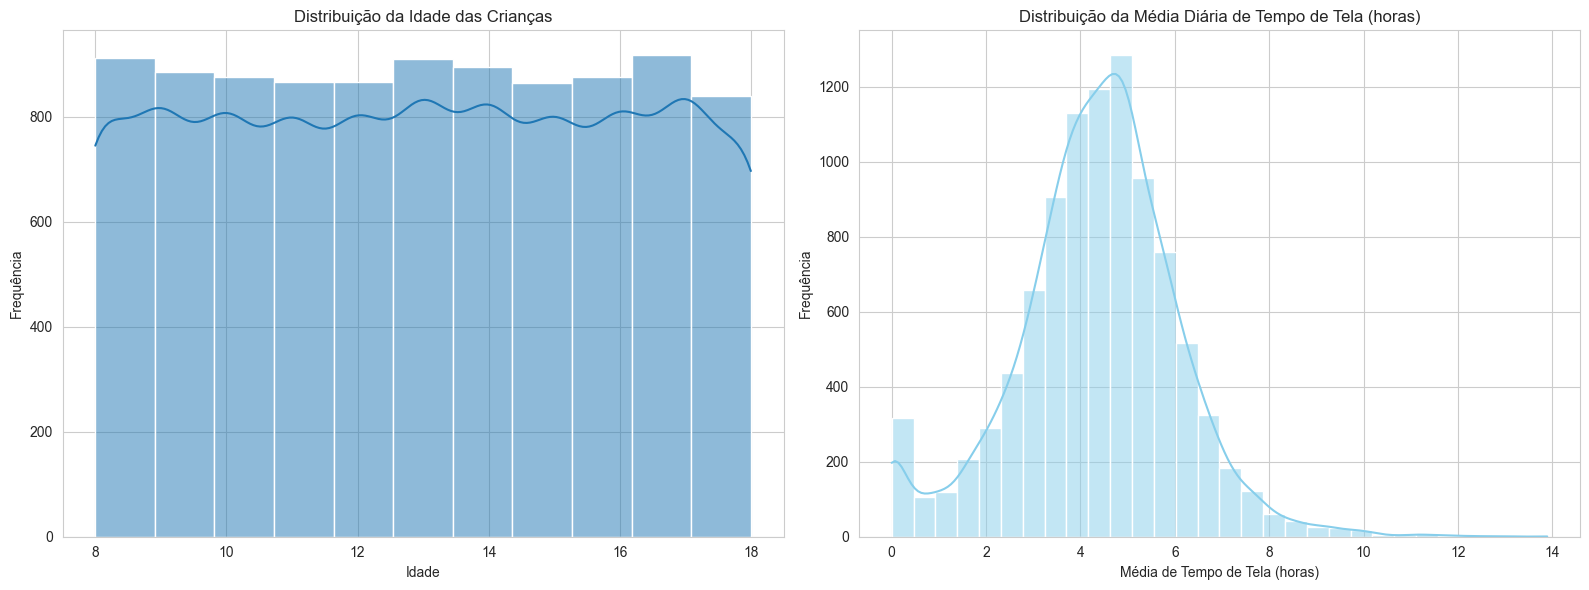

In [31]:
# Criando uma figura com dois subplots (um ao lado do outro)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histograma para a variável 'Age'
sns.histplot(df['Age'], bins=11, kde=True, ax=axes[0])
axes[0].set_title('Distribuição da Idade das Crianças')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Histograma para a variável 'Avg_Daily_Screen_Time_hr'
sns.histplot(df['Avg_Daily_Screen_Time_hr'], bins=30, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Distribuição da Média Diária de Tempo de Tela (horas)')
axes[1].set_xlabel('Média de Tempo de Tela (horas)')
axes[1].set_ylabel('Frequência')

# Ajusta o layout para não haver sobreposição
plt.tight_layout()
plt.show()


### Box Plot

- O que é? Um Box Plot que exibe a distribuição de múltiplas variáveis numéricas lado a lado, facilitando a comparação de suas escalas e distribuições.
- Nosso Objetivo: Observar e comparar a escala e a dispersão de todas as nossas variáveis numéricas (Age, Avg_Daily_Screen_Time_hr, Educational_to_Recreational_Ratio) em um único local.

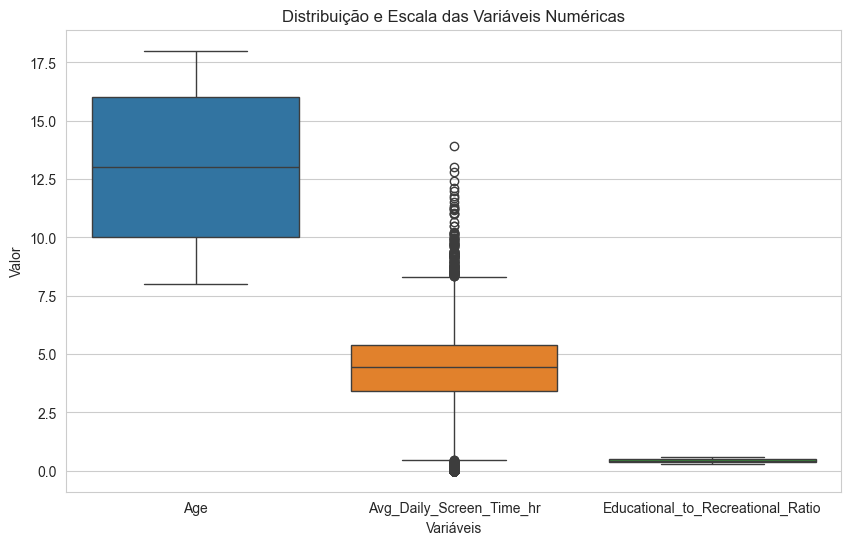

In [ ]:
# Seleciona apenas as colunas numéricas de interesse
numerical_cols = ['Age', 'Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']

# Cria o box plot usando seaborn
sns.boxplot(data=df[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()


In [34]:
!pip install scikit-learn

^C


  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------------------- -------- 6.8/8.7 MB 32.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.8/8.7 MB 32.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 8.1 MB/s  0:00:01
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/3 [threadpoolctl]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

# Aplicando StandardScaler
df_standard_scaled = df[numerical_cols].copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

# Aplicando MinMaxScaler
df_minmax_scaled = df[numerical_cols].copy()
df_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

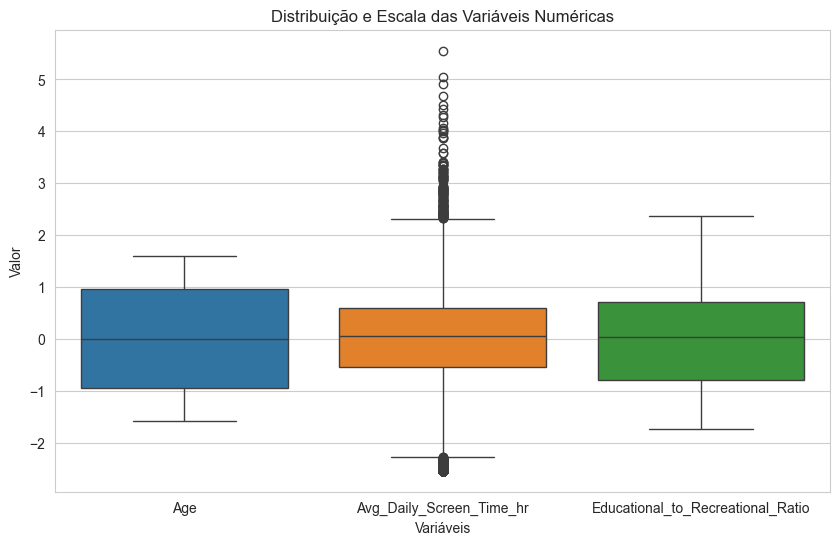

In [37]:
sns.boxplot(data=df_standard_scaled[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()

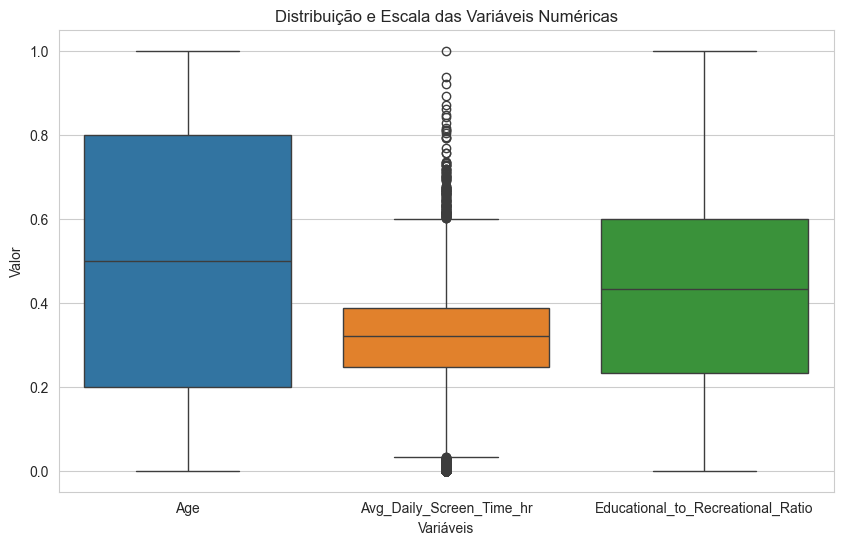

In [39]:
sns.boxplot(data=df_minmax_scaled[numerical_cols])
plt.title('Distribuição e Escala das Variáveis Numéricas')
plt.ylabel('Valor')
plt.xlabel('Variáveis')
plt.show()

### Gráfico de Barras (Contagem Categórica)

- O que é? Um gráfico de barras que mostra a contagem de cada categoria em uma variável.
- Nosso Objetivo: Visualizar qual o dispositivo principal mais comum e a distribuição de gênero no dataset.

C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\1282654382.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Primary_Device', data=df, ax=axes[0], palette='viridis', order = df['Primary_Device'].value_counts().index)
C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\1282654382.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, ax=axes[1], palette='plasma')


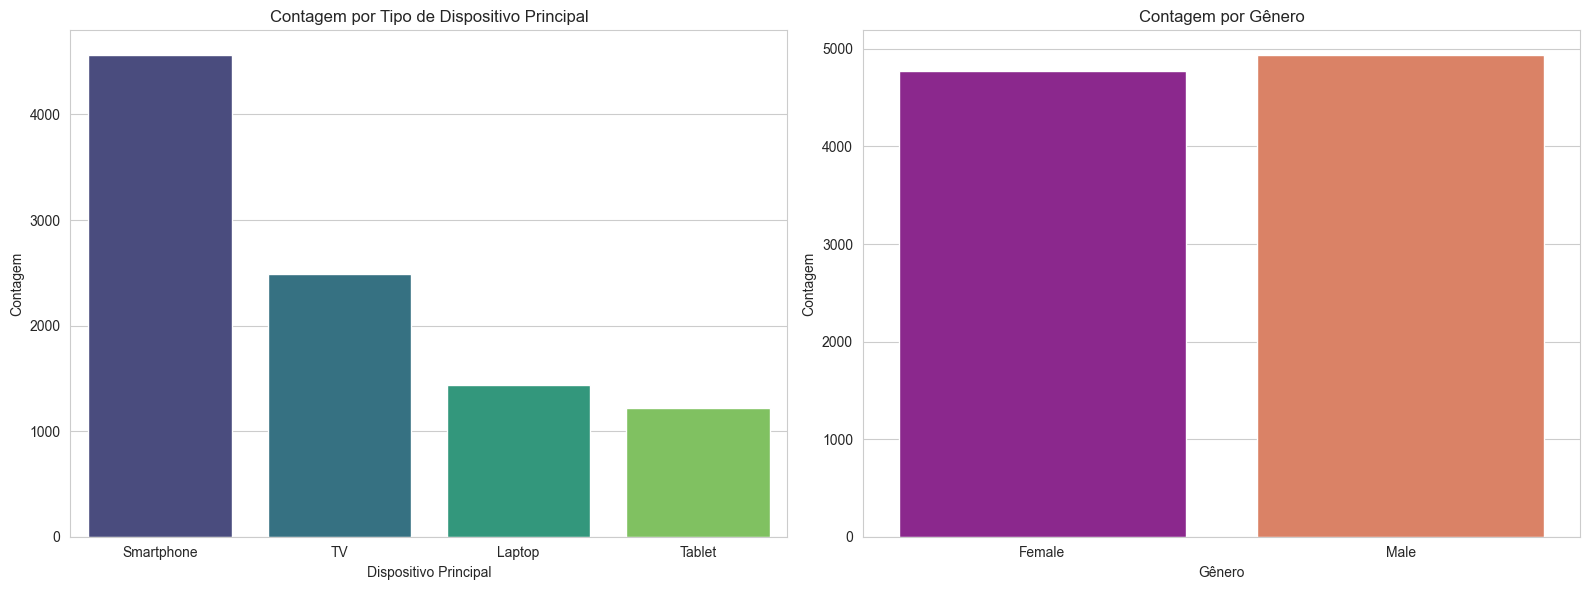

In [40]:
# Criando uma figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de Barras para 'Primary_Device'
sns.countplot(x='Primary_Device', data=df, ax=axes[0], palette='viridis', order = df['Primary_Device'].value_counts().index)
axes[0].set_title('Contagem por Tipo de Dispositivo Principal')
axes[0].set_xlabel('Dispositivo Principal')
axes[0].set_ylabel('Contagem')

# Gráfico de Barras para 'Gender'
sns.countplot(x='Gender', data=df, ax=axes[1], palette='plasma')
axes[1].set_title('Contagem por Gênero')
axes[1].set_xlabel('Gênero')
axes[1].set_ylabel('Contagem')

plt.tight_layout()
plt.show()


## Análise Bivariada (Relação entre Duas Variáveis)

### Célula 5: Box Plots Agrupados (Numérica vs. Categórica)

- O que é? Uma série de Box Plots para comparar a distribuição de uma variável numérica entre diferentes grupos.
- Nosso Objetivo: Comparar a Média Diária de Tempo de Tela (Avg_Daily_Screen_Time_hr) entre Gêneros (Gender).

C:\Users\joaov\AppData\Local\Temp\ipykernel_6564\3215290621.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')


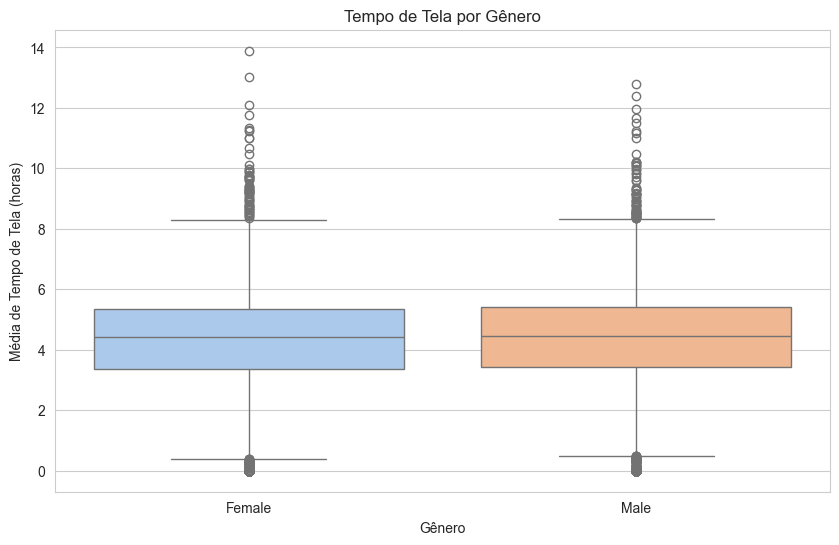

In [41]:
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, palette='pastel')
plt.title('Tempo de Tela por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.show()


### Gráfico de Dispersão (Numérica vs. Numérica)

- O que é? Um gráfico que usa pontos para mostrar a relação entre duas variáveis numéricas.
- Nosso Objetivo: Investigar se existe uma correlação entre a Idade (Age) e a Média Diária de Tempo de Tela (Avg_Daily_Screen_Time_hr).

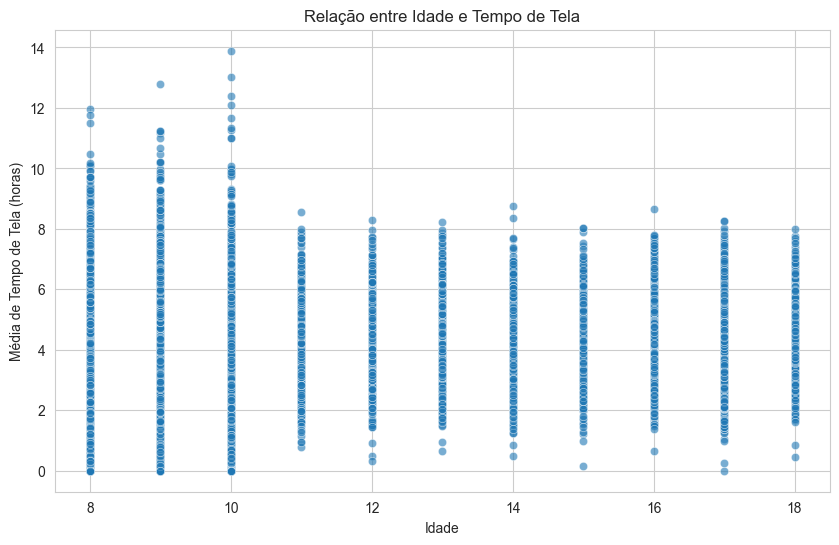

In [42]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df, alpha=0.6)
plt.title('Relação entre Idade e Tempo de Tela')
plt.xlabel('Idade')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.show()


### Gráfico de Barras Agrupadas (Categórica vs. Categórica)

- O que é? Um gráfico de barras que compara a contagem de uma variável categórica através das categorias de uma segunda variável.
- Nosso Objetivo: Entender se o tipo de Dispositivo Principal (Primary_Device) varia entre as áreas Urbana ou Rural (Urban_or_Rural).

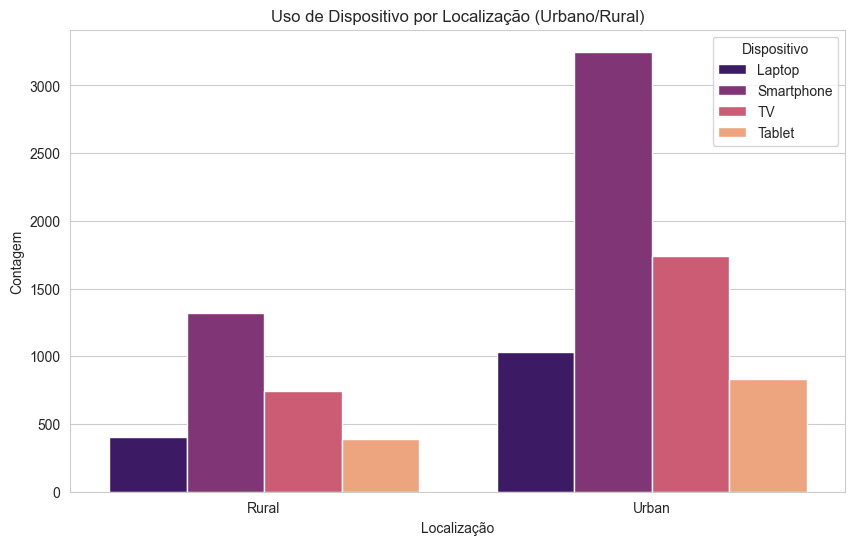

In [43]:
sns.countplot(x='Urban_or_Rural', hue='Primary_Device', data=df, palette='magma')
plt.title('Uso de Dispositivo por Localização (Urbano/Rural)')
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.legend(title='Dispositivo')
plt.show()


## Análise Multivariada (Relação entre Três ou Mais Variáveis)

### Gráfico de Dispersão com Cor (Multivariado)

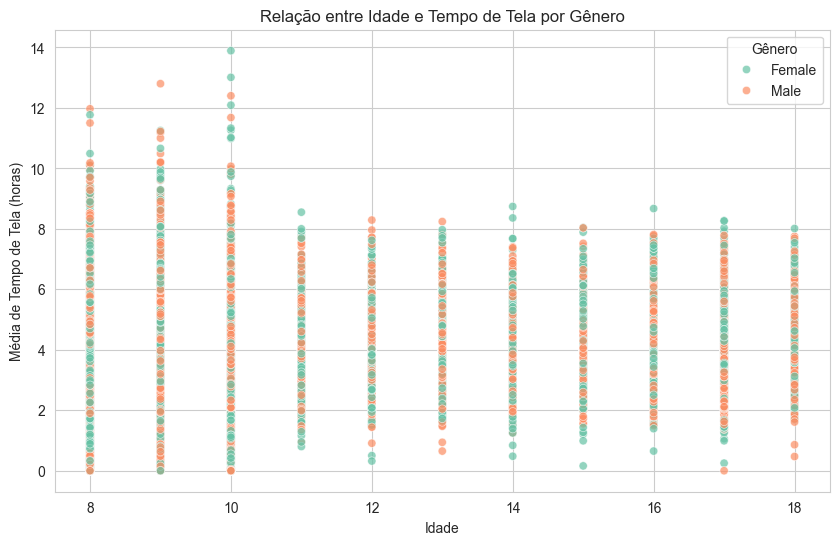

In [46]:
sns.scatterplot(x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', data=df, alpha=0.7, palette='Set2')
plt.title('Relação entre Idade e Tempo de Tela por Gênero')
plt.xlabel('Idade')
plt.ylabel('Média de Tempo de Tela (horas)')
plt.legend(title='Gênero')
plt.show()